In [2]:
import numpy as np
import pandas as pd

In [3]:
folder_path = "/home/olga/CAB/NRP/data/Test/TestDB/"
ans_path = folder_path + "ans.csv"

ans_pairs = set()
peptide = dict()
genome = dict()

In [4]:
ans_df = pd.read_csv(ans_path)
for index, row in ans_df.iterrows():
    ans_pairs.add((row["peptide"], row["organism"]))

In [5]:
def addInfoPeptide(info_path):
    with open(info_path) as f:
        for row in f:
            peptide[row.split()[0].split('/')[-1][:-4]] = row.split()[-1]
            
def addInfoGenome(info_path):
    with open(info_path) as f:
        for row in f:
            genome[row.split()[0]] = row.split()[1]
        

In [6]:
for folder in ["dataset1", "dataset2", "dataset3"]:
    addInfoPeptide(folder_path + folder + "/structure_filter.info")
    addInfoGenome(folder_path + folder + "/prediction_filter.info")

In [7]:
def getMolId(path):
    last = path.split('/')[-1]
    if ("gr" in last):
        last = last[:-3]
    return last

In [8]:
def getPredictionId(path):
    parts = path.split('/')
    idd = parts[0]
    for part in parts:
        if "GCF" in part:
            idd = part.split('genomic')[0] + "genomic"
    return idd

In [9]:
def isWrong(idMol, idPred):
    return (peptide[idMol], genome[idPred]) not in ans_pairs

In [10]:
def getScoreList(res_file_name):
    res_df = pd.read_csv(res_file_name)
    res = []
    for index, row in res_df.iterrows():
        res.append((float(row["score"]), isWrong(getMolId(row["mol id"]), getPredictionId(row["prediction id"])), 
                   getMolId(row["mol id"]), getPredictionId(row["prediction id"]), int(row["match cnt"])))
    res.sort()
    res = res[::-1]
    return res

In [65]:
def FDR(mergelist):
    curOne = 0

    cntElem = []
    FDR = []
    
    elemCnt = min(len(mergelist), 120)
    for i in range(elemCnt):
        if (i > 0 and mergelist[i - 1][0] != mergelist[i][0]):
            cntElem.append(i)# - curOne)
            FDR.append(curOne/i)
        curOne += mergelist[i][1]

    cntElem.append(elemCnt)
    FDR.append(curOne/elemCnt)
    
    return cntElem, FDR

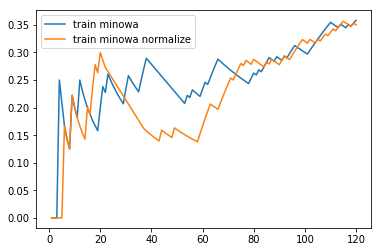

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline 

for folder in ["dataset1"]:#, "dataset2", "dataset3"]:
    #x1, y1 = FDR(getScoreList(folder_path + folder + "/minowa.csv"))
    #plt.plot(x1, y1, label="minowa")
    
    #x2, y2 = FDR(getScoreList(folder_path + folder + "/prism.csv"))
    #plt.plot(x2, y2, label="prism")
    
    #x3, y3 = FDR(getScoreList(folder_path + folder + "/nrpspredictor2.csv"))
    #plt.plot(x3, y3, label="nrpspredictor2")
    
    #x4, y4 = FDR(getScoreList(folder_path + folder + "/nrpspredictor2.csv"))
    #plt.plot(x4, y4, label="nrpspredictor2_bl")
    
    #x5, y5 = FDR(getScoreList(folder_path + folder + "/prism.csv"))
    #plt.plot(x5, y5, label="prism_bl")
    
    #x6, y6 = FDR(getScoreList(folder_path + folder + "/minowa.csv"))
    #plt.plot(x6, y6, label="minowa_bl")
    
    x9, y9 = FDR(getScoreList(folder_path + folder + "/train/minowa.csv"))
    plt.plot(x9, y9, label="train minowa")
    
    x10, y10 = FDR(getScoreList(folder_path + folder + "/train/minowa_norm.csv"))
    plt.plot(x10, y10, label="train minowa normalize")
    
    plt.legend()
    #x7, y7 = FDR(getScoreList(folder_path + folder + "/sandpuma.csv"))
    #plt.plot(x7, y7, label="sandpuma")
    #plt.legend()
    
    #x8, y8 = FDR(getScoreList(folder_path + folder + "/garlic.csv"))
    #plt.plot(x8, y8, label="garlic")
    #plt.legend()
    

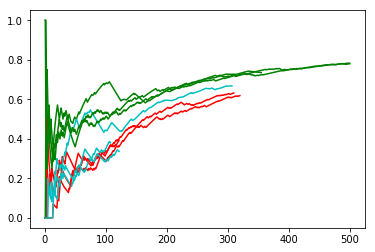

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline 

for folder in ["dataset1", "dataset2", "dataset3"]:
    x1, y1 = FDR(getScoreList(folder_path + folder + "/minowa.csv"))
    plt.plot(x1, y1, label="minowa", color="r")
    
    x2, y2 = FDR(getScoreList(folder_path + folder + "/prism.csv"))
    plt.plot(x2, y2, label="prism", color="g")
    
    x3, y3 = FDR(getScoreList(folder_path + folder + "/nrpspredictor2.csv"))
    plt.plot(x3, y3, label="nrpspredictor2", color="c")
    #plt.legend()

In [33]:
folder = "dataset1"
for predictor in ["minowa", "prism", "nrpspredictor2"]:
    score_list = getScoreList(folder_path + folder + "/" + predictor + ".csv")
    print(predictor)
    cntWrong = 0
    i = 0
    while cntWrong < 10:
        if score_list[i][1] == True:
            print(i, score_list[i][0], score_list[i][2], score_list[i][3])
            cntWrong += 1        
        i += 1

minowa
3 7.99309 antimarin2012_26949 GCF_000010165.1_ASM1016v1_genomic
7 6.994689999999999 antimarin2012_26949 GCF_002215075.1_ASM221507v1_genomic
18 5.7243699999999995 mibig_682 GCF_000988485.1_ASM98848v1_genomic
19 5.68372 antimarin2012_26949 GCF_000255295.1_ASM25529v1_genomic
23 5.46279 QCP30-L GCF_002202015.1_ASM220201v1_genomic
24 5.4562 mibig_682 GCF_001708425.1_ASM170842v1_genomic
25 5.41604 antimarin2012_35777 GCF_000517305.1_ASM51730v1_genomic
44 4.988 OTG26-O GCF_000219535.2_ASM21953v3_genomic
45 4.98525 BOW79-M GCF_000218915.1_ASM21891v1_genomic
46 4.9663900000000005 antimarin2012_50943 GCF_000219535.2_ASM21953v3_genomic
prism
0 16.1146 antimarin2012_26949 GCF_000010165.1_ASM1016v1_genomic
3 12.075 antimarin2012_26949 GCF_002215075.1_ASM221507v1_genomic
4 11.9522 QYN99-A GCF_000219535.2_ASM21953v3_genomic
7 10.2888 QYN99-A GCF_000010165.1_ASM1016v1_genomic
8 10.2122 antimarin2012_50943 GCF_000219535.2_ASM21953v3_genomic
15 9.3918 antimarin2012_28307 GCF_000198775.1_ASM19877v

In [21]:
def getDecoyScoreList(res_file_name):
    res_df = pd.read_csv(res_file_name)
    res = []
    for index, row in res_df.iterrows():
        is_wrong = 0
        if "decoy" in row["mol id"]:
            is_wrong = 1
            
        res.append((float(row["score"]), is_wrong, 
                   getMolId(row["mol id"]), getPredictionId(row["prediction id"]), int(row["match cnt"])))
    res.sort()
    res = res[::-1]
    return res

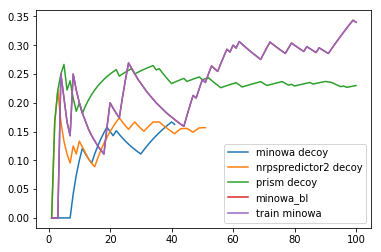

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline 

for folder in ["dataset1"]:#, "dataset2", "dataset3"]:
    x1, y1 = FDR(getDecoyScoreList(folder_path + folder + "/minowa_decoy.csv"))
    y1 = [x/3 for x in y1]
    plt.plot(x1, y1, label="minowa decoy")
    plt.legend()
    
    x2, y2 = FDR(getDecoyScoreList(folder_path + folder + "/nrpspredictor2_decoy.csv"))
    y2 = [x/3 for x in y2]
    plt.plot(x2, y2, label="nrpspredictor2 decoy")
    plt.legend()
    
    x3, y3 = FDR(getDecoyScoreList(folder_path + folder + "/prism_decoy.csv"))
    y3 = [x/3 for x in y3]
    plt.plot(x3, y3, label="prism decoy")
    plt.legend()
    
    
    x6, y6 = FDR(getScoreList(folder_path + folder + "/minowa_bl.csv"))
    plt.plot(x6, y6, label="minowa_bl")
    plt.legend()
    
    x7, y7 = FDR(getScoreList(folder_path + folder + "/train/minowa.csv"))
    plt.plot(x6, y6, label="train minowa")
    plt.legend()
    

In [ ]:
for predictor in ["minowa_decoy"]:
    score_list = getDecoyScoreList(folder_path + folder + "/" + predictor + ".csv")
    print(predictor)
    cntWrong = 0
    i = 0
    while cntWrong < 10:
        if score_list[i][1] == True:
            print(i, score_list[i][0], score_list[i][2], score_list[i][3])
            cntWrong += 1        
        i += 1

In [13]:
genomes_predicted_len = {}

def fill_predicted_len(filename):
    df = pd.read_csv(filename)
    res = []
    for index, row in df.iterrows():
        genomes_predicted_len[row["id"]] = int(row["len"])
    
fill_predicted_len("/home/olga/CAB/NRP/data/Test/TestDB/NRPsMatcher_TestDataset-bc.csv")

print(genomes_predicted_len)

{'GCF_002162355.1_ASM216235v1_genomic': 118, 'GCF_000258535.2_ASM25853v2_genomic': 89, 'GCF_000255295.1_ASM25529v1_genomic': 87, 'GCF_001685605.1_ASM168560v1_genomic': 86, 'GCF_000014565.1_ASM1456v1_genomic': 80, 'GCF_000599545.1_ASM59954v1_genomic': 79, 'GCF_000331735.1_ASM33173v1_genomic': 78, 'GCF_000218915.1_ASM21891v1_genomic': 77, 'GCF_000010805.1_ASM1080v1_genomic': 76, 'GCF_000250655.1_ASM25065v1_genomic': 74, 'GCF_000219535.2_ASM21953v3_genomic': 73, 'GCF_001307275.1_ASM130727v1_genomic': 64, 'GCF_001027285.1_ASM102728v1_genomic': 64, 'GCF_000988395.1_ASM98839v1_genomic': 63, 'GCF_000988565.1_ASM98856v1_genomic': 63, 'GCF_000525635.1_ASM52563v1_genomic': 63, 'GCF_001482725.1_ASM148272v1_genomic': 61, 'GCF_000012685.1_ASM1268v1_genomic': 61, 'GCF_000012245.1_ASM1224v1_genomic': 60, 'GCF_000988485.1_ASM98848v1_genomic': 60, 'GCF_000597985.1_ASM59798v1_genomic': 59, 'GCF_000250675.2_ASM25067v3_genomic': 59, 'GCF_000523235.1_ASM52323v1_genomic': 58, 'GCF_000696675.2_ASM69667v2_gen

In [38]:
good_dist = []
decoy_dist = []

def calc_predicted_len_dist(score_list):
    for item in score_list:
        val = item[4]/genomes_predicted_len[item[3]]
        if (item[1] == 0):
            if (val < 0.18):
                print(item)
            good_dist.append(val)
        else:
            if (val > 0.6):
                print(item[3])
            decoy_dist.append(item[4]/genomes_predicted_len[item[3]])

#calc_predicted_len_dist(getDecoyScoreList(folder_path + "dataset1/minowa_decoy.csv"))
calc_predicted_len_dist(getScoreList(folder_path + "dataset3/train/minowa.csv"))

good_dist.sort()
decoy_dist.sort()
print(good_dist)
print(decoy_dist)


GCF_000756615.1_ASM75661v1_genomic
(2.75257, False, 'QCP28-Q', 'GCF_000026105.1_ASM2610v1_genomic', 6)
(2.6839999999999997, False, 'antimarin2012_10212', 'GCF_000026105.1_ASM2610v1_genomic', 6)
(2.3444, False, 'antimarin2012_47286', 'GCF_000026105.1_ASM2610v1_genomic', 6)
(2.3444, False, 'QMK48-P', 'GCF_000026105.1_ASM2610v1_genomic', 6)
(2.3444, False, 'BOW79-M', 'GCF_000026105.1_ASM2610v1_genomic', 6)
(2.10994, False, 'LQY02-O', 'GCF_000026105.1_ASM2610v1_genomic', 6)
[0.17647058823529413, 0.17647058823529413, 0.17647058823529413, 0.17647058823529413, 0.17647058823529413, 0.17647058823529413, 0.1875, 0.1875, 0.19230769230769232, 0.19230769230769232, 0.19230769230769232, 0.20689655172413793, 0.20689655172413793, 0.2222222222222222, 0.2222222222222222, 0.2222222222222222, 0.2222222222222222, 0.2222222222222222, 0.23076923076923078, 0.23076923076923078, 0.23529411764705882, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.25, 0.25, 0.25, 0.25, 0.25, 0.2608695652

(array([ 0., 12.,  4.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

/home/olga/soft/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


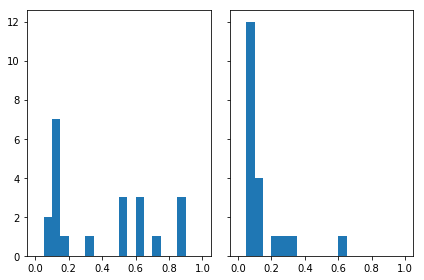

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline 

n_bins = 20
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(good_dist, bins=n_bins, range=(0, 1))
axs[1].hist(decoy_dist, bins=n_bins, range=(0, 1))

(array([0., 2., 9., 8., 3., 3., 3., 6., 3., 0., 2., 1., 0., 0., 1., 0., 0.,
        0., 0., 0.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

/home/olga/soft/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


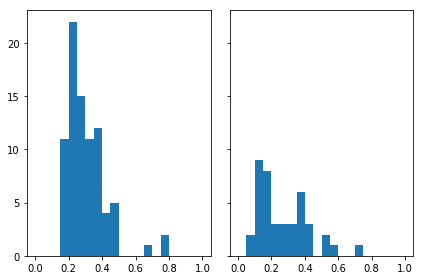

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline 

n_bins = 20
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(good_dist, bins=n_bins, range=(0, 1))
axs[1].hist(decoy_dist, bins=n_bins, range=(0, 1))

In [58]:
res = getScoreList(folder_path + "dataset2/train/minowa.csv")
for elem in res:
    if (elem[1] == 0):
        print("(\"" + elem[2] + "\", \"" + elem[3] + "\"),")

("QYN99-A", "GCF_000498975.2_ASM49897v2_genomic"),
("mibig_682", "GCF_000968195.1_ASM96819v1_genomic"),
("QCP30-L", "GCF_002021815.1_ASM202181v1_genomic"),
("antimarin2012_47286", "GCF_000336465.1_ASM33646v1_genomic"),
("BOW79-M", "GCF_000336465.1_ASM33646v1_genomic"),
("LQY02-O", "GCF_000336465.1_ASM33646v1_genomic"),
("antimarin2012_53972", "GCF_001281365.1_ASM128136v1_genomic"),
("antimarin2012_37242", "GCF_000876525.1_ASM87652v1_genomic"),
("QMK48-P", "GCF_002208745.1_ASM220874v1_genomic"),
("QMK48-P", "GCF_000336465.1_ASM33646v1_genomic"),
("antimarin2012_47286", "GCF_002208745.1_ASM220874v1_genomic"),
("QYN99-A", "GCF_002021815.1_ASM202181v1_genomic"),
("QCP30-L", "GCF_000026105.1_ASM2610v1_genomic"),
("antimarin2012_47286", "GCF_001579805.1_ASM157980v1_genomic"),
("BOW79-M", "GCF_001579805.1_ASM157980v1_genomic"),
("antimarin2012_47286", "GCF_001647715.1_ASM164771v1_genomic"),
("BOW79-M", "GCF_001647715.1_ASM164771v1_genomic"),
("LQY02-O", "GCF_001579805.1_ASM157980v1_genomic"),